# U Shaped GMM Demo
This Python Notebook showcases the use of ML-Cur with a simple GMM toytask.

The dataset is sampled from a GMM with three components, arranged in a U shape in 2D space.

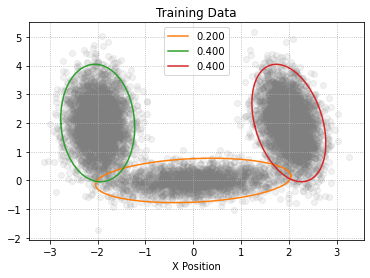

In [1]:
from u_gmm_demo import gmm_dataset
from u_gmm_demo.gmm_vis import Gmm2dVisualizer

data = gmm_dataset.create_default_gmm_set()
vis = Gmm2dVisualizer()
vis.plot_model(data.model, data=data.train_samples, title="Training Data")

## EM Baseline

In [2]:
from ml_cur import EmGmm

em_gmm = EmGmm(n_components=2, train_iter=20)
em_gmm.fit(data.train_samples)

With just two components, the EM approach mode averages over two of the underlying, hidden components.

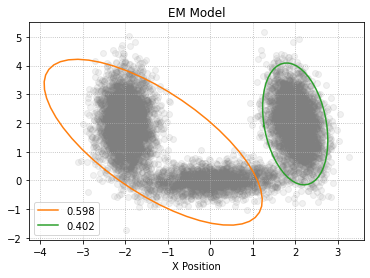

In [3]:
vis.plot_model(em_gmm.model, data=data.train_samples, title="EM Model")

## ML-Cur Model

In [4]:
from ml_cur import MlCurGmm

ml_cur_gmm = MlCurGmm(2, 10, num_active_samples=0.4)
ml_cur_gmm.fit(data.train_samples)

With ML-Cur, even though we also only use two model components, the trained GMM does not show mode averaging.
The Number of active samples is chosen to be `0.4 = 0.8 / num_components`

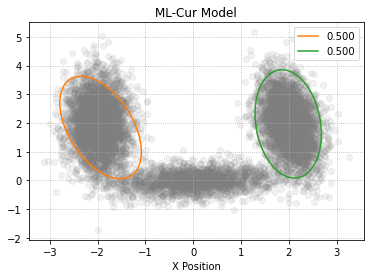

In [5]:
vis.plot_model(ml_cur_gmm.model, data=data.train_samples, title="ML-Cur Model")